In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
import statsmodels.api as sm
import scipy.stats as stats
from statsmodels.stats.outliers_influence import variance_inflation_factor as VIF

In [ ]:
df1=pd.DataFrame({'age':[45,36,38,44,58,67,28,32,30,25],
                 'glu':[230,210,215,228,260,320,200,208,205,180]})

In [ ]:
df1

In [ ]:
plt.plot(df1['age'],df1['glu'],'*')

In [ ]:
plt.scatter(df1['age'],df1['glu'],marker='+')

In [ ]:
x=df1['age']
y=df1['glu']
# beta1=np.sum((x-np.mean(x))*(y-np.mean(y)))/np.sum((x-np.mean(x))**2)
# beta1
x

In [ ]:
xbar=np.mean(x)
ybar=np.mean(y)
beta1=np.sum((x-xbar)*(y-ybar))/(np.sum((x-xbar)**2))

In [ ]:
beta1 

In [ ]:
beta0= ybar-beta1*xbar

In [ ]:
beta0

In [ ]:
y_pred= beta0+beta1*x 

In [ ]:
y_pred

In [ ]:
plt.plot(x,y,'*')
plt.plot(x,y_pred)

In [ ]:
from sklearn.linear_model import LinearRegression


In [ ]:
LR=LinearRegression()

In [ ]:
X=df['age']   ####################################################we have to give dataframe otherwise its throwing an error
Y=df['glu']
LR=LinearRegression()
LR.fit(X,Y)
LR.intercept_LR.coef_

In [ ]:
X=df1[['age']]
Y=df1['glu']
LR.fit(X,Y)
LR.intercept_,LR.coef_

In [ ]:
y_pred=LR.intercept_,+LR.coef_*x
df1['y_pred']=y_pred

In [ ]:
#plt.plot(x,y,'*')
plt.plot(X,y_pred,'+')

In [ ]:
y_pred_bad=140*1.5*x
y_pred_bad
np.sum(y-y_pred_bad)

In [ ]:
plt.plot(x,y,'*')
#plt.plot(x,y_pred)
plt.plot(x,y_pred_bad)

# LOGISTIC REGRESSION

In [56]:
df1=pd.DataFrame({'class':[1,0,0,1,1,1,0,0,0,0],
                 'glu':[230,210,215,228,260,320,200,208,205,180]})       

In [57]:
df1

,class,glu
0,1,230
1,0,210
2,0,215
3,1,228
4,1,260
5,1,320
6,0,200
7,0,208
8,0,205
9,0,180


In [58]:
x=df1['glu']
y=df1['class']

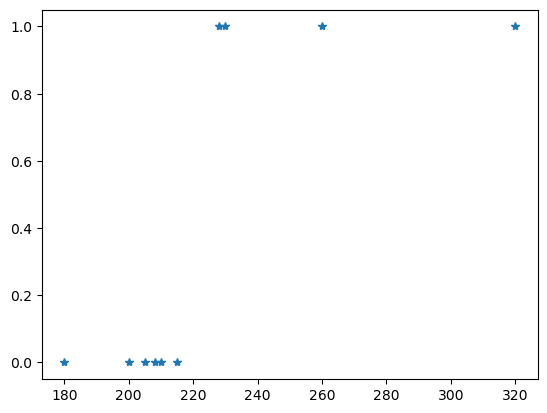

In [59]:
plt.plot(df1['glu'],df1['class'],'*')

In [60]:
xbar=np.mean(x)
ybar=np.mean(y)
beta1=np.sum((x-xbar)*(y-ybar))/(np.sum((x-xbar)**2))

In [61]:
beta0= ybar-beta1*xbar

In [62]:
beta1

0.009724333782737155

In [63]:
beta0

-1.793809701385502

In [64]:
y_pred= beta0+beta1*x 

In [65]:
y_pred

0    0.442787
1    0.248300
2    0.296922
3    0.423338
4    0.734517
5    1.317977
6    0.151057
7    0.228852
8    0.199679
9   -0.043430
Name: glu, dtype: float64

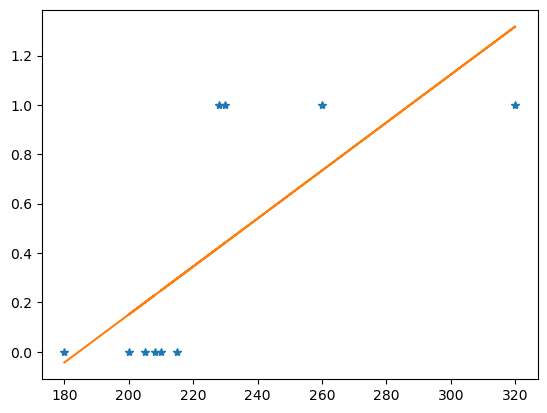

In [66]:
plt.plot(x,y,'*')
plt.plot(x,y_pred)

In [67]:
y_prob=1/(1+np.exp(-beta0-beta1*x))
y_prob

0    0.608923
1    0.561758
2    0.573690
3    0.604282
4    0.675796
5    0.788845
6    0.537693
7    0.556965
8    0.549754
9    0.489144
Name: glu, dtype: float64

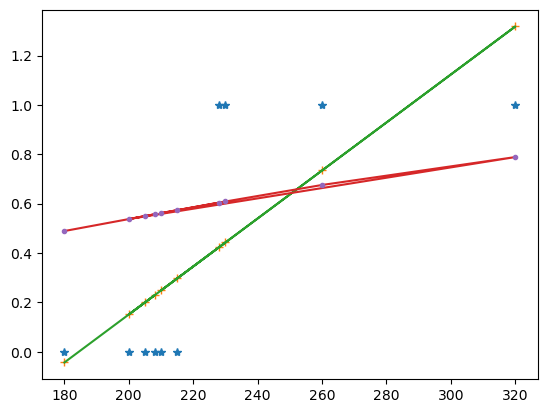

In [68]:
plt.plot(x,y,'*')
plt.plot(x,y_pred ,'+')
plt.plot(x,y_pred )
plt.plot(x,y_prob)
plt.plot(x,y_prob,'.')

In [69]:
y_class=[]
for val in y_prob:
    if val>=np.mean(y_prob):
        y_class.append(1)
    else:
        y_class.append(0)
print(y_class)        
        

[1, 0, 0, 1, 1, 1, 0, 0, 0, 0]


In [70]:
df1['class']

0    1
1    0
2    0
3    1
4    1
5    1
6    0
7    0
8    0
9    0
Name: class, dtype: int64

In [71]:
from sklearn.linear_model import LogisticRegression

In [78]:
X=df1[['glu']]
Y=df1['class']

In [79]:
LogReg=LogisticRegression()


In [80]:
LogReg.fit(X,Y) #  function fits a logistic regression model to the training data X and corresponding target values Y. 
                #  The model learns the relationship between the input features and the target variable
                #  calculates the weights or coefficients for each feature that best fit the data
                #  In summary, LogReg.fit(X,Y) is used to train a logistic regression mode

LogisticRegression()

In [81]:
LogReg.predict(X)  # function uses trained LRM to predict the target variable for new set of input data X
                   # It takes the input data as an argument and returns the predicted class labels for the data
                   # The predicted class labels are calculated using the learned weights or coefficients from the LRM 
                   # function to evaluate the performance of the trained model on new, unseen data
                # This helps us to determine how well the model is able to generalize to new data and make accurate predictions
                   # In summary, LogReg.predict(X) is used to predict the class labels for new input data.

array([1, 0, 0, 1, 1, 1, 0, 0, 0, 0], dtype=int64)

In [75]:
LogReg.predict_proba(X)   # function is used to predict the probabilities of the class labels for a new set of input data X, 
                          # using a logistic regression model that has been previously trained on some training data.
                        

array([[9.83021468e-03, 9.90169785e-01],
       [9.97510857e-01, 2.48914260e-03],
       [9.65838245e-01, 3.41617551e-02],
       [2.78726303e-02, 9.72127370e-01],
       [1.22414123e-09, 9.99999999e-01],
       [0.00000000e+00, 1.00000000e+00],
       [9.99987580e-01, 1.24199398e-05],
       [9.99136712e-01, 8.63287816e-04],
       [9.99823984e-01, 1.76015967e-04],
       [1.00000000e+00, 3.07687863e-10]])

steps 


1.  load dataset
2.  x= df[feature] , y=df[target]
3.  xbar= np.mean(x), ybar= np.mean(y)
4.  beta1= (np.sum((x-xbar)*(y-ybar)))/(sn.sum(x-xbar))
5.  beta0= ybar - beta1*x
6.  ypred= beta0+beta1*x
7.  import liblary ----------from sklearn.linear_model import LogisticRegression
8.  X=df1[['glu']]  ,    Y=df1['class']
9.  define -------------LogReg=LogisticRegression()
10.  LogReg.fit(X,Y)
11. LogReg.predict(X)
12. LogReg.predict_proba(X)

# DAY2

In [ ]:
import numpy as np 
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
import statsmodels.api as sm
import scipy.stats as stats
from statsmodels.stats.outliers_influence import variance_inflation_factor as VIF
import statistics as stats

In [ ]:
# inferential statistics
n=800
xbar=1085000
s=125000
sig_lvl=0.05
# To estimate the avg sal of 5 yrs exp. DS working in India,
# give the 95% CI range of 5 yrs exp DS sal working in India

In [ ]:
# Q2
# Swiggy BLR want to study their delivery quality and applying for certification operation team expects their avg delivery time 
# to any pact of BLR is within 40 min. Qa team randomly picks past data n=1500 with mean del. time 38.8min with sd=12 min 
# Does swiggy Dataset rejects their Quality std

n=1500
xbar=38.8
s=12
mu=40
sig_lvl=0.05
# h0 - the avg delivery time greater than and equal to 40 
# ha - the avg delivery time less than 40 min 


In [ ]:
# covishield want  to study their effectiveness of their vaccice scientist expects the immunity level of 1 st dose will be 
# effective for 240 days Random volanteries n=2000 have called and studied their reinfection cares  1st dosage found to be 235 days
# within sd= 15 days  does the scientist  expectation holds good 

n=2000
mu=240
xbar=235
std_dev=15
sig_lvl=0.05
# h0: the immunity of 1st dose will be effective less than equal to for 240 days 
# ha: the immunity of 1st dose will effective greater than 240 days
t= ((xbar)-mu)/(std_dev/np.sqrt(n))
t

In [ ]:
np.sqrt(2000)

In [ ]:
15/44.7213

In [ ]:
0.8/0.335

# DAY3

In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
import statsmodels.api as sm
import scipy.stats as stats
from statsmodels.stats.outliers_influence import variance_inflation_factor as VIF
import statistics as stats

In [ ]:
df=pd.DataFrame({'age':[32,45,28,30,54,24,65,20,48,50],
                 'bmi':[6.2,7.2,4.3,4.5,8.2,4.1,6.3,5.5,6.5,7.2],
                 'class':[1,1,0,0,1,0,1,0,1,1]})

In [ ]:
df.head()

In [ ]:
np.mean(df['age'])

In [ ]:
np.mean(df['bmi'])

In [ ]:
df.head()

In [ ]:
df_healthy=df[df['class']==0]
df_healthy

In [ ]:
df_diab=df[df['class']==1]
df_diab

In [ ]:
df_healthy.describe()

In [ ]:
df_diab.describe()

In [ ]:
# Gaussian Probablity Density Function 
def my_gpdf(x,mean,sd):
    exponent=np.exp(-((x-mean)**2/(2*sd**2)))
    return (1/(np.sqrt(2*np.pi)*sd))*exponent
    

In [ ]:
# for age 30 and bmi 4.5 

In [ ]:
test_age=(30-df['age'].mean())/df['age'].std()      # we have to perform this we have to run df and then
test_age

In [ ]:
test_bmi=4.5-df['bmi'].mean()/df['bmi'].std()
test_bmi

In [ ]:
my_gpdf(-0.648,-0.952,0.29)

In [ ]:
my_gpdf(-0.648,0.6349,0.7325)

In [ ]:
# for healthy  and diabetic age 50 and bmi 6.8

In [ ]:
test_age=(50-df['age'].mean())/df['age'].std()        # we have to perform this we have to run df and then
test_age

In [ ]:
test_bmi= (6.8-df['bmi'].mean())/df['bmi'].std()
test_bmi

In [ ]:
my_gpdf(0.702,0.6349,0.7325)*my_gpdf(0.58,0.677,0.549)*0.6

In [ ]:
my_gpdf(0.702,-0.952,0.29)*my_gpdf(0.58,-1.01,0.4511)*0.4

# DAY4

In [31]:
from sklearn.ensemble import RandomForestClassifier,BaggingClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split

In [6]:
age=np.array([13,14,15,25,35,49,68,71,73])

In [15]:
a=np.mean(age)

In [16]:
np.mean((age-a)**2)

577.1111111111111

In [26]:
(13+14+15+35)/4

19.25

In [28]:
(25+49+68+71+73)/5

57.2

In [18]:
#est1_pred
y1_pred=np.array([19.25,19.25,19.25,57.2,19.25,57.2,57.2,57.2,57.2])
y1_pred

array([19.25, 19.25, 19.25, 57.2 , 19.25, 57.2 , 57.2 , 57.2 , 57.2 ])

In [19]:
np.mean((age-y1_pred)**2)

221.50555555555556

In [20]:
(age-y1_pred)

array([ -6.25,  -5.25,  -4.25, -32.2 ,  15.75,  -8.2 ,  10.8 ,  13.8 ,
        15.8 ])

In [24]:
#combined_pred
y_pred_out=np.array([15.68,15.68,15.68,53.63,15.68,64.33,53.63,64.33,64.33])
y_pred_out

array([15.68, 15.68, 15.68, 53.63, 15.68, 64.33, 53.63, 64.33, 64.33])

In [25]:
np.mean((age-y_pred_out)**2)

196.06334444444448

In [36]:
# gboost_model = GradientBoostingClassifier(n_estimators = 100, max_depth = 3, random_state = 8)
# # X_train, X_test, y_train, y_test = train_test_split(X, df_target, random_state = 10, test_size = 0.2)
# # # fit the model using fit() on train data
# # gboost_model.fit(X_train, y_train)

# y_pred_gb = gboost_model.predict(X_test)

# print('The accuracy score is ', round(accuracy_score(y_test, y_pred_gb), 4))

In [15]:
import pandas as pd
# df=pd.DataFrame({'Gender':10,
#                  'smoker':1})    If using all scalar values, you must pass an index

import pandas as pd

df= pd.DataFrame({'Gender': [10],
                   'Smoker': [1]})
df

,Gender,Smoker
0,10,1


# Harshal work

# Odds Ratio

In [2]:
import numpy as np

# Define the number of events in each group

event_group1 = 50
non_event_group1 = 50
event_group2 = 20
non_event_group2 = 80

# Calculate the odds ratio
odds_ratio = (event_group1 / non_event_group1) / (event_group2 / non_event_group2)

print("Odds Ratio:", odds_ratio)


Odds Ratio: 4.0
